# Paper: Confocal non-line-of-sight based on the light-cone transform

## Abstract
How to image objects that are hidden from a camera’s view is a problem of fundamental importance to many fields of research1–20, with applications in robotic vision, defence, remote sensing, medical imaging and autonomous vehicles. Non-line-of-sight (NLOS) imaging at macroscopic scales has been demonstrated by scanning a visible surface with a pulsed laser and a time-resolved detector14–19. Whereas light detection and ranging (LIDAR) systems use such measurements to recover the shape of visible objects from direct reflections21–24, NLOS imaging reconstructs the shape and albedo of hidden objects from multiply scattered light. Despite recent advances, NLOS imaging has remained impractical owing to the prohibitive memory and processing requirements of existing reconstruction algorithms, and the extremely weak signal of multiply scattered light. Here we show that a confocal scanning procedure can address these challenges by facilitating the derivation of the light-cone transform to solve the NLOS reconstruction problem. This method requires much smaller computational and memory resources than previous reconstruction methods do and images hidden objects at unprecedented resolution. Confocal scanning also provides a sizeable increase in signal and range when imaging retroreflective objects. We quantify the resolution bounds of NLOS imaging, demonstrate its potential for real-time tracking and derive efficient algorithms that incorporate image priors and a physically accurate noise model. Additionally, we describe successful outdoor experiments of NLOS imaging under indirect sunlight. 

### 摘要中的重点

摘要中的重点包括:

+ 非视距成像，即当照相机与物体之间有障碍物时的成像，有很多应用，包括在机器视觉，遥感，医学成像，自动驾驶等
+ 通过脉冲激光和时间分辨探测器扫描可见表面已经验证了宏观尺度上的非视距成像
+ 尽管NLOS最近取得了不少的进展，但NLOS成像仍旧不切实际，原因包括:
     + 现有重建算法对于存储和处理速度的要求过高
     + 多次散射后光信号极弱
+ 本文说明了共焦扫描可以通过促进光锥变换的实现来解决NLOS的重建问题
+ 这种基于光锥变换的共焦非视距成像的优点有：
     + 时间复杂度低
     + 空间复杂度低
     + 成像分辨率高
     + 当对逆向反射物体进行成像时，共焦扫描还可以显着增加信号和范围
+ 本文的其他工作
     + 量化了NLOS成像的分辨率界限
     + 展示了其实时跟踪的潜力
     + 推导出包含图像先验和物理精确噪声模型的高效算法
     + 描述了在间接阳光下成功进行NLOS成像的户外实验。

## Paragraph 1
LIDAR systems use time-resolved sensors to scan the three- dimensional (3D) geometry of objects21–24. Such systems acquire range measurements by recording the time required for light to travel along a direct path from a source to a point on the object and back to a sensor. Recently, these types of sensors have also been used to perform NLOS tracking12,13 or imaging14–20 of objects ‘hidden around corners’, where the position and shape of the objects are computed from indirect light paths. The light travelling along indirect paths scatters multiple times before reaching a sensor and may scatter off objects outside a camera’s direct line of sight (Fig. 1). Recovering images of hidden objects from indirect light paths involves a challenging inverse problem because there are infinitely many such paths to consider. With applications in remote sensing and machine vision, NLOS imaging could enable capabilities for a variety of imaging systems.


### 第一段
LIDAR系统使用时间分辨传感器扫描物体的三维（3D）几何结构[21-24]。 这样的系统通过记录光沿着从源到物体上的点并返回到传感器的直接路径行进所需的时间来获取距离测量值。 最近，这些类型的传感器也被用于执行对象“隐藏在角落周围”的NLOS跟踪12,13或成像14-20，其中对象的位置和形状是从间接光路计算的。沿着间接路径传播的光在到达传感器之前会散射多次，并且可能会散射出摄像机直接视线外的物体（图1）。 从间接光路中恢复隐藏对象的图像涉及具有挑战性的逆问题，因为需要考虑无限多个这样的路径。 借助遥感和机器视觉应用，NLOS成像可以实现各种成像系统的功能。

## Paragraph 2
The challenging task of imaging objects that are partially or fully obscured from view has been tackled with approaches based on timegated imaging2, coherence gating3, speckle correlation4,5, wavefront shaping6, ghost imaging7,8, structured illumination9 and intensity imaging10,11. At macroscopic scales, the most promising NLOS imaging systems rely on time-resolved detectors12–20. However, NLOS imaging with time-resolved systems remains a hard problem for three main reasons. First, the reconstruction step is prohibitively computationally demanding, in terms of both memory requirements and processing cycles. Second, the flux of multiply scattered light is extremely low, requiring either extensive acquisition times in dark environments or a sufficiently high-power laser to overcome the contribution of ambient light. Finally, NLOS imaging often requires a custom hardware system made with expensive components, thus preventing its widespread use.

### 第二段
使用基于时间门控成像[2]，相干门控[3]，散斑相关[4,5]，波前成像[6]，重影成像[7,8]，结构照明[9]和强度成像[10,11]的方法解决了成像部分或完全模糊的物体的挑战性任务。 在宏观尺度上，最有前景的NLOS成像系统依赖于时间分辨探测器[12-20]。 
然而，具有时间分辨系统的NLOS成像仍然是一个难题，主要有三个原因。 

+ 首先，就存储器要求和处理周期而言，重建步骤在计算上要求极高。 
+ 其次，多次散射光的通量非常低，需要在黑暗环境中的大量采集时间或足够高功率的激光来克服环境光的贡献。 
+ 最后，NLOS成像通常需要使用昂贵组件制造的定制硬件系统，从而阻止其广泛使用。

## Paragraph 3
Confocal NLOS (C-NLOS) imaging aims to overcome these challenges. Whereas previous NLOS acquisition setups exhaustively illuminate and image pairs of distinct points on a visible surface (such as a wall), the proposed system illuminates and images the same point (Fig. 1) and raster-scans this point across the wall to acquire a 3D transient (that is, time-resolved) image14,25–27. C-NLOS i maging offers several  advantages over existing methods. First, it facilitates the  derivation of a closed-form solution to the NLOS problem. The  proposed NLOS reconstruction procedure is several orders of m agnitude faster and more memory-efficient than  previous approaches, and it also  produces higher-quality reconstructions. Second, whereas indirectly scattered light remains extremely weak for diffuse objects, retroreflective objects (such as road signs, bicycle reflectors and high-visibility safety apparel) considerably increase the indirect signal by reflecting light back to its source with minimal scattering. This retroreflectance  property can only be exploited by confocalized systems that simultaneously i lluminate and image a common point and may be the enabling factor towards making NLOS imaging practical in certain applications (such as  autonomous driving). Third, LIDAR systems already perform confocal scanning to acquire point clouds from direct light paths. Our  prototype system was built from the ground up, but commercial LIDAR systems may be capable of supporting the algorithms developed here with  minimal hardware modifications.


### 第三段

共聚焦NLOS（C-NLOS）成像旨在克服这些挑战。虽然先前的NLOS采集设置在可见表面（例如墙壁）上详尽地照亮和描绘了不同点的图像对，但是所提出的系统照亮并成像相同的点（图1）并且光栅扫描该点穿过墙壁以获得3D瞬态（即时间分辨）图像[14,25-27]。 
C-NLOS成像提供了优于现有方法的若干优点。

+ 首先，它有助于推导出NLOS问题的封闭形式解决方案。与以前的方法相比，所提出的NLOS重建过程比几个数量级更快且更具记忆效率，并且它还产生更高质量的重建。
     + （注：封闭形式很可能指解析解）
+ 其次，对于漫射物体，间接散射光仍然非常弱，而逆向反射物体（例如道路标志，自行车反光镜和高能见度安全服装）通过以最小散射将光反射回其光源而显着增加间接信号。这种后向反射特性只能由共聚焦系统利用，这些系统同时发光并成像公共点，并且可能是使NLOS成像在某些应用（例如自动驾驶）中实用的有利因素。
+ 第三，LIDAR系统已经执行共焦扫描以从直接光路获取点云。我们的原型系统是从头开始构建的，但商用LIDAR系统可能能够通过最少的硬件修改来支持此处开发的算法。

## Paragraph 4
Similarly to other NLOS imaging approaches, our image formation model makes the following assumptions: there is only single scattering behind the wall (that is, no inter-reflections in the hidden part of the scene), light scatters isotropically (that is, the model ignores Lambert’s cosine terms), and no occlusions occur within the hidden scene. Our approach also supports retroreflective materials through a minor modification of the image formation model.


### 第四段

与其他NLOS成像方法类似，我们的图像形成模型做出以下假设：

+ 墙后面只有单一的散射（也就是说，场景的隐藏部分没有相互反射）
+ 各向同性地散射光（即模型忽略兰伯特的余弦项）
+ 并且隐藏的场景中不会出现遮挡

我们的方法还通过对图像形成模型的微小修改来支持逆向反射材料。

## Paragraph 5
C-NLOS measurements consist of a two-dimensional set of temporal histograms, acquired by confocally scanning points x′ , y′ on a planar wall at position z′=0. This 3D volume of measurements, $\tau$, is given by  
$$\tau(x',y',t)=\int\int\int_{\Omega}\frac{1}{r^{4}}\rho(x,y,z)\delta(2\sqrt{(x'-x)^{2}+(y'-y)^{2}+z^{2}}-tc)dxdydz$$

equation (6)

where c is the speed of light. Every measurement sample $\tau (x',y',t)$ captures the photon flux at point (x', y') and time t relative to an incident pulse scattered by the same point at time t = 0. Here, the  function ρ is the albedo of the hidden scene at each point (x, y, z) with z > 0 in the 3D half-space Ω. The Dirac delta function δ represents the surface of a spatio-temporal four-dimensional hypercone given by $x^2 +y^2 +z^2 − (tc/2)^2 = 0$, which models light propagation from the wall to the object and back to the wall. It is also closely related to Minkowski’s light cone[28], which is a geometric representation of light propagation through space and time. We note that the function is shift-invariant in the x and y axes, but not in the z axis. A feature of this formulation is that the distance function $r= \sqrt{(x'-x)^2 +(y'-y)^2 +z^2} =tc/2$ can be expressed in terms of the arrival time t; the radiometric term $1/r^4$ can thus be pulled out of the triple integral. Equation (1) can also be modified to model retroreflective materials by replacing $1/r^4$ with $1/r^2$, which represents a large increase in the flux of the indirect light (see Supplementary Information for details).

### 第五段
C-NLOS测量由一组二维时间直方图组成，通过在位置z'= 0处的平面壁上的共焦扫描点x'，y'获得。这个3D体积测量值$\tau$由下式给出

$$\tau(x',y',t)=\int\int\int_{\Omega}\frac{1}{r^{4}}\rho(x,y,z)\delta(2\sqrt{(x'-x)^{2}+(y'-y)^{2}+z^{2}}-tc)dxdydz$$

其中c是光速。 每个测量样本τ（x'，y'，t）捕获点（x'，y'）处的光子通量和相对于在时间t = 0处由相同点散射的入射脉冲的时间t。这里，函数ρ 是在3D半空间Ω中z> 0的每个点（x，y，z）处的隐藏场景的反照率。 狄拉克δ函数δ表示由$x^2+y^2+z^2-(tc/2)^2=0$给出的时空四维超锥的表面，其模拟来自墙的光传播 到物体并回到墙上。它也与Minkowski的光锥[28]密切相关，它是光在空间和时间传播的几何表示。我们注意到该函数在x和y轴上是移位不变的，但在z轴上不是。 该公式的一个特征是距离函数$r=\sqrt{(x'-x)^2+(y'-y)^2+z^2} = tc / 2$可以用 到达时间t表示; 因此，辐射度项$1 / r ^ 4 $可以从三重积分中拉出。 方程式（1）也可以修改为通过用$1 / r ^ 2$替换$1 / r ^ 4$来模拟逆向反射材料，这代表间接光通量的大幅增加（详见补充信息）。


## Paragraph 6
The most remarkable property of equation (1) is the fact that a change of variables in the integral by $z=\sqrt{u}$,$dz/du=1/(2\sqrt{u})$ and $v= (tc/2)^2$ results in


$$\underbrace{v^{3/2}\tau (x',y',2\sqrt{v} /c)}_{R_{t}\{\tau \}(x',y',v)}=\int\int\int_{\Omega}\underbrace{\frac{1}{2\sqrt{u}}\rho (x,y,\sqrt{u})}_{R_{z}\{\rho \}(x,y,u)}\underbrace{\delta((x'-x)^2+(y'-y)^2+u-v)}_{h(x-x',y-y',v-u)}dxdydu$$
equation (2)

which can be expressed as a straightforward 3D convolution, where $R_t\{ \tau \}=h∗R_z\{\rho \}$ . Here, the function h is a shift-invariant 3D convolution kernel, the transform $R_z$ nonuniformly resamples and attenuates the elements of volume ρ along the z axis, and the transform $R_t$ nonuniformly resamples and attenuates the measurements τ along the time axis. The inverses of both $R_z$ and $R_t$ also have closed-form expressions. We refer to equation (2) as the light-cone transform (LCT).


### 第6段
等式（1）中最显着的特性是将积分式中的变量进行如下代换: $z = \sqrt{u}$，$dz/du = 1/(2\sqrt{u})$和$v =(tc / 2)^ 2$,则有

$$\underbrace{v^{3/2}\tau (x',y',2\sqrt{v} /c)}_{R_{t}\{\tau \}(x',y',v)}=\int\int\int_{\Omega}\underbrace{\frac{1}{2\sqrt{u}}\rho (x,y,\sqrt{u})}_{R_{z}\{\rho \}(x,y,u)}\underbrace{\delta((x'-x)^2+(y'-y)^2+u-v)}_{h(x-x',y-y',v-u)}dxdydu$$
equation (2)

    
这可以表示为一个简单的3D卷积，其中$R_t \{\tau \} = h * R_z \{\rho \}$。 这里，函数h是一个移位不变的3D卷积核，变换$R_z$不均匀地重新采样并衰减沿z轴的体积ρ的元素，并且变换$R_t$不均匀地重新采样并衰减沿时间轴的测量值τ。$R_z$和$R_t$的反转也有闭式表达式。我们将等式(2)称为光锥变换(LCT)。

## Paragraph 7
The image formation model can be discretized as $R_t\tau =HR_z\rho$, where $\tau \in \mathbb{R}_+^{n_{x}n_{y}n_{t}}$ is the vectorized representation of the measurements, and $\rho \in \mathbb{R}_+^{n_{x}n_{y}n_{z}}$ is the vectorized volume of the albedos of the hidden surface. The process of discretizing each function involves defining a finite grid and integrating the function over each cell in the grid. The matrix $H \in \mathbb{R}_+^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{h}}$ represents the shift-invariant 3D convolution operation, and the matrices $R_{t} \in \mathbb{R}_+^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{t}}$ and $R_z \in \mathbb{R}_+^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{z}}$ represent the transformation operations applied to the temporal and spatial dimensions, respectively. We note that both transformation matrices are independently applied to their respective dimension and can therefore be applied to large-scale datasets in a computationally and memory-efficient way. Similarly, the 3D convolution operation H can be computed efficiently in the Fourier domain. Together, these matrices represent the discrete LCT.

### 第7段
图像形成模型可以离散为$R_t\tau=HR_z\rho$，其中$\tau \in \mathbb{R}_+^{n_{x}n_{y}n_{t}}$是向量化的 测量的表示，$\rho \in \mathbb{R}_+^ {n_{x} n_{y} n_{z}}$是隐藏曲面的反照率的矢量化体积。 离散每个函数的过程包括定义有限网格并将函数集成在网格中的每个单元格上。矩阵$H\in \mathbb{R}_+^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{h}}$表示移位不变3D卷积操作;矩阵$R_{t} \in \mathbb{R} _+^{n_{x}n_{y}n_{h}\times n_ {x}n_{y}n_{t}}$和 $R_z \in \mathbb {R}_+^{n_{x}n_{y}n_{h} \times n_{x}n_{y}n_{z}}$表示分别应用于时间和空间维度的变换操作。我们注意到，两个变换矩阵都独立地应用于它们各自的维度，因此可以以计算和存储效率的方式应用于大规模数据集。 类似地，可以在傅里叶域中有效地计算3D卷积运算H. 这些矩阵一起代表离散LCT。

## Paragraph 8
By treating NLOS imaging as a spatially invariant 3D deconvolution problem, a closed-form solution can be derived from the convolution theorem. The convolution operation is expressed as an element-wise multiplication in the Fourier domain and inverted according to 
$$\rho_{\ast}=R_{z}^{-1}F^{-1}(\frac{1}{\widehat{H}}\frac{|\widehat{H}|^{2}}{|\widehat{H}|^{2}+\frac{1}{\alpha}})FR_{t}\tau$$

*maybe it should be*
$$\rho_{\ast}=R_{z}^{-1}F^{-1}[(\frac{1}{\widehat{H}}\frac{|\widehat{H}|^{2}}{|\widehat{H}|^{2}+\frac{1}{\alpha}})F(R_{t}\tau)]$$


```
% Step 3: Convolve with inverse filter and unpad result
tvol = ifftn(fftn(tdata).*invpsf);
```

where F is the 3D discrete Fourier transform, $\rho_{\ast}$  is esitimated volume of the albedos of the hidden surface, $\hat{H}$ is a diagonal matrix containing the Fourier coefficients of the 3D convolution kernel, and α represents the frequency-dependent signal-to-noise ratio of the measurements. This approach is based on Wiener filtering[29], which minimizes the mean squared error between the reconstructed volume and the ground truth. As α approaches infinity, the formulation above becomes an inverse filter (that is, the filter applied in the frequency domain is $1/\hat{H}$). Similarly, the Fourier-domain filter in equation (3) could be replaced by $\hat{H}^{\ast}$ to implement a backprojection reconstruction procedure. Wiener filtering with a constant α inaccurately assumes that the transformed measurements contain white noise. Therefore, we also derive an iterative reconstruction procedure that combines the LCT with a physically accurate Poisson noise model (Supplementary Information).


### 第8段
通过将NLOS成像视为空间不变的3D反卷积问题，可以从卷积定理导出闭合形式的解。 卷积运算表示为傅里叶域中的逐元素乘法，并根据下式进行反转

$$\rho_{\ast}=R_{z}^{-1}F^{-1}[(\frac{1}{\widehat{H}}\frac{|\widehat{H}|^{2}}{|\widehat{H}|^{2}+\frac{1}{\alpha}})F(R_{t}\tau)]$$

其中F是3D离散傅立叶变换，$\rho_{\ast}$是隐藏曲面的反照率的估计体积，$\hat{H}$是包含3D卷积核的傅里叶系数的对角矩阵，并且 α表示测量的频率相关信噪比。 这种方法基于维纳滤波[29]，它最小化了重建体积和地面实况之间的均方误差。当α接近无穷大时，上面的公式变为逆滤波器（即，在频域中应用的滤波器为$1/\hat {H}$）。 类似地，等式（3）中的傅里叶域滤波器可以由$\hat{H}^{\ast}$替换以实现反投影重建过程。具有常数α的维纳滤波不准确地假设变换的测量值包含白噪声。 因此，我们还推导出一种迭代重建程序，该程序将LCT与物理上精确的泊松噪声模型相结合(详见补充信息)。



## Paragraph 9
Figure 2 illustrates the inverse LCT applied to indirect measurements of a bunny model simulated with a physically based ray tracer[30]. The process involves evaluating equation (3) in three steps: (i) resampling and attenuating the measurements $\tau$ with the transform $R_t$, (ii) applying the Wiener filter to the result, and (iii) applying the inverse transform $R_z^{-1}$ to recover ρ. These three steps are efficient in terms of memory and number of operations required. The most costly step is the application of the Wiener filter, which requires $O(N^{3}logN)$ operations for the 3D fast-Fourier transforms and has memory requirements of $O(N^3)$, where N is the maximum number of elements across all dimensions in spacetime. In comparison, existing backprojection-type  reconstructions15–17 require $O(N^5)$ operations, and methods based on inversion are much more costly both in their memory and processing requirements[17,18,20].

### 第九段
图2显示了应用于用物理光线追踪器模拟的兔子模型间接测量的逆LCT [30]。 该过程包括分3步评估等式(3):

(i)使用变换$R_t$重新采样和衰减测量值$\tau$

(ii)将Wiener滤波器应用于结果

(iii)应用逆变换$R_z^{-1}$来恢复ρ。

这三个步骤在内存和所需操作次数方面都很有效。 代价最昂贵的一步是应用Wiener滤波器，它需要$O(N^{3}logN)$操作用于3D快速傅里叶变换，并且内存要求为$O(N^3)$，其中N是时空中所有维度的最大元素数。相比之下，现有的反投影型重建[15-17]需要$O(N^5)$操作，基于反演的方法在内存和处理要求方面成本更高[17,18,20]。

## Paragraph 10
In addition to improved runtime and memory efficiency, a  primary benefit of the LCT over backprojection-based approaches is that the inverted solution is accurate. In Fig. 3, we compare the reconstruction quality of the backprojection algorithm and the LCT for a retroreflective traffic sign. The dimensions of the hidden sign are 0.61 m ×0.61 m and the diffuse wall is sampled at 64 ×64 locations over a 0.8 m ×0.8 m region. The total exposure time is 6.8 min (that is, 0.1 s per sample) and the runtime for MATLAB to recover a volume of 64 ×64 ×512 voxels is 1 s on a MacBook Pro (3.1-GHz Intel Core i7). To compare the reconstruction quality of the two methods, we compute the backprojection result using the LCT, which is just as efficient as inverting the problem with the LCT. Even though unfiltered backprojection could be slightly sharpened by linear filters, such as a Laplacian[15], backprojection methods do not solve the inverse problem (see Supplementary Information for detailed comparisons). In Supplementary Information, we also show a variety of reconstructed example scenes, as well as results for NLOS tracking[11–13] of retroreflective objects in real time.

### 第10段
除了提高运行时和内存效率之外，LCT相对于基于反投影的方法的主要优点是反转解决方案是准确的。在图3中，我们比较了反向投影算法和LCT对逆向反射交通标志的重建质量。隐藏标志的尺寸为0.61 m×0.61 m，漫反射墙在0.8 m×0.8 m区域的64×64位置采样。总曝光时间为6.8分钟（即每个样品0.1秒），在MacBook Pro（3.1-GHz Intel Core i7）上，MATLAB恢复64×64×512体素的运行时间为1秒。为了比较两种方法的重建质量，我们使用LCT计算反投影结果，这与用LCT反演问题一样有效。即使未经过滤的反投影可以通过线性滤波器（例如拉普拉斯算子[15]）略微锐化，反投影方法也不能解决反问题（参见补充信息以进行详细比较）。在补充信息中，我们还展示了各种重建的示例场景，以及实时逆向反射物体的NLOS跟踪[11-13]的结果。

## Paragraph 11
Applying NLOS imaging outdoors requires the indirect light from the hidden object to be detected in the presence of strong ambient illumination. To accomplish this, C-NLOS imaging takes advantage of the high light throughput associated with retroreflective objects. Figure 3 presents an outdoor NLOS experiment under indirect  sunlight (approximately 100 lx). The dimensions of the hidden retroreflective object are 0.76 m × 0.51 m, with 32 × 32 sampled locations over a 1 m ×1 m area. The exposure is 0.1 s per sample, with a total exposure time of 1.7 min. MATLAB reconstructs a volume of 32 ×32 ×1,024 voxels in 0.5 s.

### 第11段
在户外应用NLOS成像需要在强环境照明情况下来自被检测物体的间接光. 为了实现这一点，C-NLOS成像利用了与逆向反射物体相关的高光通量。 图3显示了在间接阳光下（约100 lx）的室外NLOS实验。 隐藏的逆向反射物体的尺寸为0.76米×0.51米，在1米×1米的区域内有32×32个采样位置。 每个样采样点的曝光量为0.1秒，总曝光时间为1.7分钟。 MATLAB在0.5秒内重建体积为32×32×1,024的体素。

## Paragraph 12
The fundamental bounds on the resolution of NLOS imaging approaches couple the full-width at half-maximum of the temporal resolution of the imaging system, represented by the scalar $\gamma$, to the smallest resolvable axial $\Delta z$  and lateral $\Delta x$  spatial feature size as follows

$$\Delta z \geq \frac{c\gamma }{2} \qquad and \qquad \Delta x \geq \frac{c\sqrt{w^{2}+z^{2}}}{2w}\gamma$$

where 2w is the sampled width or height of the visible wall (see Supplementary Information for details).

### 第12段
NLOS成像方法的分辨率的基本界限将成像系统的时间分辨率的半高全宽（由标量$\gamma$表示）耦合到最小的可解析轴向$\Delta z$和横向$\Delta x$的空间特征大小如下

$$\Delta z \geq \frac{c\gamma }{2} \qquad and \qquad \Delta x \geq \frac{c\sqrt{w^{2}+z^{2}}}{2w}\gamma$$

其中2w是可见墙的采样宽度或高度（有关详细信息，请参阅补充信息）。

## Paragraph 13
To evaluate the limits of the reconstruction procedure, we simulate the acquisition of 1,024 ×1,024 points sampled over a 1 m ×1 m area and 1,024 time bins with a temporal resolution of 8 ps per bin. We recover a volume containing 1,024 ×1,024 ×1,024 voxels. Figure 4 shows the target geometry in grey and the recovered shape overlaid in green. The error map indicates a median absolute reconstruction error of 2.5 mm (mean absolute error 15.1 mm, mean square error 2.7 mm). Occlusions and higher-order bounces of indirect illumination are not modelled by any existing NLOS imaging method, including ours, which may lead to violations in the image formation model and errors in the reconstructed volume. For example, the right ear of the bunny is not accurately recovered owing to self-occlusions by the left ear in the measurements. We note that the conventional approach of discretizing and inverting the image formation model at this resolution would require an excess of 9 petabytes of memory just to store a sparse representation of the linear system.

### 第13段
为了评估重建过程的限制，我们模拟了在1 m×1 m区域和1,024个时间区间采样的1,024×1,024个点，每个区间的时间分辨率为8 ps。我们恢复了包含1,024×1,024×1,024个体素的体积。 图4显示了灰色的目标几何图形和绿色覆盖的恢复形状。误差图表明中值绝对重建误差为2.5 mm（平均绝对误差15.1 mm，均方误差2.7 mm）。间接照明的遮挡和高阶反弹不是由任何现有的NLOS成像方法建模的，包括我们的，这可能导致图像形成模型中的违规和重建体积中的错误。例如，由于测量中左耳的自阻挡，兔子的右耳没有准确地恢复。 我们注意到，在该分辨率下离散化和反转图像形成模型的传统方法将需要超过9PB的存储器来存储线性系统的稀疏表示。

## Paragraph 14
The co-design of a confocal scanning technique and a computationally efficient inverse method facilitates fast, high-quality reconstructions of hidden objects. To achieve real-time frame rates with C-NLOS imaging, three improvements to our current prototype are required. First, to reduce acquisition time, a more powerful laser is needed. For eye-safe operation, this laser may need to operate in the short-wave infrared regime11,12,22. Second, for retroreflective objects, the measurement of multiple histograms can be performed in parallel, with minimal crosstalk. This property could enable a single-photon avalanche diode (SPAD) array and a diffused laser source to acquire the full C-NLOS image in a single shot. Third, to improve the computation time, our highly parallelizable algorithm could be implemented in a graphics processing unit or a field-programmable gate array.

### 第14段
共焦扫描技术和计算高效的反向方法的协同设计有助于快速，高质量地重建隐藏物体。为了使用C-NLOS成像实现实时帧速率，我们需要对当前原型进行三项改进。

+ 首先，为了缩短采集时间，需要更强大的激光器。 为了安全操作，这种激光器可能需要在短波红外线下工作[11,12,22]。
+ 其次，对于逆向反射物体，多个直方图的测量可以并行执行，具有最小的串扰。 该特性可以使单光子雪崩二极管（SPAD）阵列和漫射激光源能够在单次拍摄中获得完整的C-NLOS图像。
+ 第三，为了改善计算时间，我们的高度可并行化算法可以在图形处理单元或现场可编程门阵列中实现。

## Paragraph 15
The proposed technique thus enables NLOS imaging with conventional hardware at much higher speeds, with a smaller memory footprint and lower power consumption, over a longer range, under ambient lighting and at higher resolution than any existing approach of which we are aware.

### 第15段
因此，所提出的技术能够以更高的速度使用传统硬件进行NLOS成像，具有更小的存储器占用面积和更低的功耗，在更长的范围内，在环境照明下以及比我们所知的任何现有方法更高的分辨率。

# Supplementary Information
Confocal non-line-of-sight based on the light-cone transform

## Supplementary Methods
补充方法

### Equipment details
The time-resolved detector is a PDM series single photon avalanche diode (SPAD) from Micro Photon Devices with a 100 µm⇥ 100 µm active area, a reported 27 ps timing jitter (100 kHz laser at 675 nm), and 40.9 dark counts per second. Detection events are time stamped with 4ps temporal resolution using a PicoHarp 300 Time-Correlated Single Photon Counting (TCSPC) module. The detected light is focused by a 75mm achromatic doublet (Thorlabs AC254-075-A-ML), and filtered using a laser line filter (Thorlabs FL670-10). The detection optics are co-axially aligned with an active light source using a polarized beamsplitter (Thorlabs PBS251). The light source (ALPHALAS PICOPOWER-LD-670-50) consists of a 670 nm wavelength pulsed laser diode with a reported pulse width of 30.6ps at a 10MHz repetition rate and 0.11mW average power. A 2-axis scanning galvonometer (Thorlabs GVS012) raster scans the illumination and detection spots across a wall located approximately 2m from the system at an oblique angle. The measured jitter of the entire system is approximately 60 ps without the laser line filter, and 200 ps with the filter on. We only use the filter for the outdoor experiments to reduce ambient light. The increase in jitter is due to the fact that the spectral transmission properties of the filter affect the temporal characteristics of the imaging system via the time-bandwidth product.16 An appropriate choice of spectral line filter and pulsed laser could mitigate this effect.

![Overview of confocal image equipments and measurements](image/NLOS_s1_0.jpg)


#### 实验装置

实验装置包括：

+ 时间分辨探测器(time-resolved detector14)
     + Micro Photon Devices的PDM系列单光子雪崩二极管（SPAD）
     + 有效面积为$100μm\times 100μm$
     + 27 ps定时抖动（675 nm处的100 kHz激光）
     + 每秒40.9的暗计数
     + 产品网站:
         + 国外官网 http://www.micro-photon-devices.com/Products/Photon-Counters/PDM
         + 国内代理 http://www.etsc-tech.com/article-show-39-1829.html
     + 价格
         + ![SPAD Sensor Price](image/image001.jpg)
+ 检测事件: 时间相关单光子计数器模块(TCSPC)
     + PicoHarp 300
     + 4ps时间分辨率对检测事件加时间戳(论文中是8ps)
     + 国内代理: http://www.etsc-tech.com/article-show-40-1843.html
     + 价格
         + ![Price of TCSPC](image/image002.jpg)
    + 国产其他相关产品：http://www.siminics.com/TCSPC
+ 聚焦, 868.84￥
     + 75mm消色差双合透镜
     + 型号: Thorlabs AC254-075-A-ML
     + 官网 https://www.thorlabschina.cn/newgrouppage9.cfm?objectgroup_id=2696&pn=AC254-075-A-ML#3441
     + Thorlabs上的账户&&密码: gengruixv@163.com && !QAZ2wsx3edc
+ 滤光 833.38￥
     + 激光线滤光器
     + 型号: Thorlabs FL670-10
     + https://www.thorlabschina.cn/newgrouppage9.cfm?objectgroup_id=1001&pn=FL670-10#2897
+ 分束器 2704.04￥
     + 偏振分束器
     + 型号： Thorlabs PBS251
     + 将检测光学系统与有源光源同轴对准
     + https://www.thorlabschina.cn/newgrouppage9.cfm?objectgroup_id=4137&pn=CCM1-PBS251#3924
+ 光源
     + 由670 nm波长脉冲激光二极管组成
     + 型号：ALPHALAS PICOPOWER-LD-670-50
     + 官网 http://www.alphalas.com/products/lasers/picosecond-pulse-diode-lasers-with-driver-picopower-ld-series.html
     + 代理: http://www.bjsydz.com/Product/709253648.html
     + 脉冲宽度为30.6ps
     + 重复频率为10MHz
     + 平均功率为0.11mW
     + 令一种:https://www.edmundoptics.com/p/670nm-0-300mw-fiber-coupled-laser/12208/
+ 扫描电流计 Scanning galvanometer 26020.88￥ 
     + 2轴扫描电流计光栅扫描距离系统大约2米的墙壁上的照明和检测点
     + 型号: Thorlabs GVS012
     + 通过一个倾斜角度扫描
     + https://www.thorlabschina.cn/newgrouppage9.cfm?objectgroup_id=6057&pn=GVS012#7594
+ 对抖动的说明和处理
     + 在没有激光线路滤波器的情况下，整个系统的测量抖动约为60 ps
     + 在滤波器打开时，测得的抖动为200 ps
     + 仅将滤波器用于室外实验以减少环境光
     + 抖动的增加是由于滤波器的光谱传输特性通过时间带宽积影响成像系统的时间特性这一事实
     + 适当选择谱线滤波器和脉冲激光可以减轻这种影响

### Challenges with confocal scanning
Unlike conventional approaches, a confocalized NLOS system exposes the detector to direct reflections. This can be problematic, because the overwhelmingly bright contribution of direct light reduces the SNR of the indirect signal in two ways. First, after detecting a photon, the SPAD sensor becomes inactive for approximately 75 ns and ignores any photons that strike the detector for this period of time (commonly referred to as the dead time of the device). If the contribution of direct light is too strong, this reduces the detection probability of indirect photons. Second, approximately 0.1% of detected photon events produce a secondary event due to an effect known as afterpulsing. The contribution of direct photons therefore increases the number of spurious photons detected by the SPAD, further reducing the SNR of the indirect signal. 
To avoid the negative effects of a strong direct signal, a time-gated SPAD could be used for detection to gate out photons due to direct light.16 Given that our SPAD operates in free-running mode, we instead illuminate and image two slightly different points on a wall to reduce the contribution of direct light. The distance between these points should be sufficiently small so as to not affect the confocal image formation model.

#### 共焦扫描的挑战
共焦NLOS系统会降低间接信号的SNR

+ 与传统方法不同，共焦NLOS系统使探测器暴露于直接反射
+ 直接光的绝对明亮会以两种方式降低间接信号的SNR 
     + 首先，在检测到光子之后，SPAD传感器变为无效约75ns并忽略在这段时间内撞击检测器的任何光子（通常称为器件的死区时间）。如果直射光的贡献太强，则会降低间接光子的检测概率。
     + 其次，由于称为后脉冲的效应，大约0.1％的检测到的光子事件产生了二次事件。
     + 因此，直接光子的贡献增加了SPAD检测到的伪光子的数量，进一步降低了间接信号的SNR。

降低强直接信号的负面影响的方法：

+ 使用时间选通SPAD来检测而对光子进行门控(due to direct light).
+ 鉴于我们的SPAD在自由运行模式下运行，我们在墙上照亮并成像两个稍微不同的点，以减少直射光的贡献。 这些点之间的距离应足够小，以免影响共焦图像形成模型。
     

### System calibration
The first calibration step involves aligning the detector and light source by adjusting the position of the beamsplitter to maximize the photon count rate. When perfectly aligned, the strong direct signal significantly reduces the number of indirect photons detected by the SPAD. Therefore, the second step involves slightly adjusting the position of the beamsplitter to decrease the direct photon counts and increase the indirect photon counts originating from a hidden retroreflector placed within the scene (e.g., the exit sign). The SPAD detected between 0.29 and 1 million counts per second for all experiments (i.e., the number of detected events ranged between 2.9% and 10% of the total number of pulses). For the final step, the system scans a 6 $\times$ 6 grid of points on the wall and uses the time of arrival of direct photons and known galvanometer mirror angles to compute the relative position and orientation of the wall relative to the system.

#### 系统校准
系统校准分为三步:

+ step1: 通过调整分束器的位置来对准检测器和光源，以使光子计数率最大化。
    + 当完美对齐时，强直接信号显着减少了SPAD检测到的间接光子的数量。
+ step2: 稍微调整分束器的位置以减少直接光子计数并增加源自放置在场景内的隐藏后向反射器（例如，出口标志）的间接光子计数。
    + 对于所有实验，SPAD检测每秒0.29至100万次计数（即，检测到的事件的数量在脉冲总数的2.9％至10％之间）。
+ step3: 系统扫描墙上的6 * 6网格点，并使用直接光子的到达时间和已知的检流计镜角度来计算墙相对于系统的相对位置和方向。


### Acquisition procedure
The system scans 64 $\times$ 64    equidistant points on awall for indoor experiments,and32 $\times$ 32 points for the outdoor experiment. At a 10MHz repetition rate, the PicoHarp 300 returns unprocessed histograms containing25,000 bins with a temporal resolution of 4 ps per bin. The acquired histograms are temporally aligned such that the direct pulses appear at time t =0. Histograms are then trimmed to either 2048 bins for indoor experiments or 4096 bins for the outdoor experiment. The ﬁrst 600 bins are set to 0 to remove the direct component. The histograms are then downsampled by a factor of 4 to either 512 or 1024 bins before processing,where each bin now has a temporal resolution of 16ps. The acquisition time for each histogram is either 0.1sor 1s, as indicated for each respective experiment.


#### (1)获得程序
 
+ 扫描墙的范围
     + 系统扫描墙上64 * 64等距点进行室内实验，32 * 32点进行室外实验
+ PicoHarp 300 时间相关单光子计数器模块(TCSPC)(检测事件)
     + 在10MHz的重复频率下，PicoHarp 300返回包含25,000个二进制数据的未处理直方图，每个二进制数据的时间分辨率为4 ps。 
     + 所获取的直方图在时间上对齐，使得直接脉冲出现在时间t = 0。 
     + 将直方图修剪为2048个二进制数据用于室内实验 或 4096个二进制数据用于室外实验。
     + 将前600个二进制文件设置为0以移除直接分量。
     + 然后在处理之前将直方图下采样4倍至512或1024个二进制数据，其中每个区间现在具有16ps的时间分辨率。 
     + 每个直方图的采集时间为0.1μs1s，如每个相应实验所示。

In [1]:
%   代码段1
%   选择隐藏场景
%   1 - resolution chart at 40cm from wall
%   2 - resolution chart at 65cm from wall
%   3 - dot chart at 40cm from wall
%   4 - dot chart at 65cm from wall
%   5 - mannequin
%   6 - exit sign
%   7 - "SU" scene (default)
%   8 - outdoor "S"
%   9 - diffuse "S"
scene = 2; 

% Constants
bin_resolution = 4e-12; % Native bin 
%resolution for SPAD is 4 ps
c              = 3e8;   % Speed of light 
%(meters per second)

% Adjustable parameters
isbackprop = 0;         % Toggle backprojection，切换为后向投影
isdiffuse  = 0;         % Toggle diffuse reflection，切换漫反射/直接反射
K          = 2;         % Downsample data to 
%(4 ps) * 2^K = 16 ps for K = 2,降采样四倍，512
%或1024个二进制数据，其中每个区间现在具有16ps的时间
%分辨率

snr        = 8e-1;      % SNR value，论文和支撑
%材料中表示为α
z_trim     = 600;       % Set first 600 bins 
%to zero，前600个二进制数据设置为0，以移除直接分量

%更改工作路径。此notebook与所需数据和函数不在同一目
%录下
cd('.\confocal_nlos_code')
% Load scene & set visualization parameter
switch scene
    case {1}
        load data_resolution_chart_40cm.mat
        z_offset = 350;
    case {2}
        load data_resolution_chart_65cm.mat
        z_offset = 700;
    case {3}
        load data_dot_chart_40cm.mat
        z_offset = 350;
    case {4}
        load data_dot_chart_65cm.mat
        z_offset = 700;
	case {5}
        load data_mannequin.mat
        z_offset = 300;
    case {6}
        load data_exit_sign.mat
        z_offset = 600;
    case {7}
        load data_s_u.mat
        z_offset = 800;
    case {8}
        load data_outdoor_s.mat
        z_offset = 700;
    case {9}
        load data_diffuse_s.mat
        z_offset = 100;
        
        % Because the scene is diffuse, 
        %toggle the diffuse flag and 
        % adjust SNR value correspondingly.
        % 只有场景9下才会切换为漫反射模式
        isdiffuse = 1;
        
        % 漫反射模式下信噪比降低
        snr = snr.*1e-1;
end

% rect_data: Sensor接收到的反射数据，相当于论文中的\tau
N = size(rect_data,1);        % Spatial 
%resolution of data，反射数据的空间维度
M = size(rect_data,3);        % Temporal 
%resolution of data， 反射数据的时间维度
range = M.*c.*bin_resolution; % Maximum range 
%for histogram(单位:长度单位), M:单位时间数；
%bin_resolution:单位时间长度;c:光速


% Downsample data to 16 picoseconds
for k = 1:K
    M = M./2;                                                    % 单位时间数变为1/2
    bin_resolution = 2*bin_resolution;                           % 单位时间长度增加一倍
    % 因为单位时间数变为1/2，即采样率降低了一倍。故
    %bin_resolution(两次采样之间的间隔时间)变为之
    %前两倍
    % 假设此时rect_data = N*M*Q
    % 则rect_data(:,:,1:2:end) = N*M*Q/2
    % 则rect_data(:,:,2:2:end) = N*M*Q/2
    % 更新后rect_data = N*M*Q/2 
    % Q为时间维度，故实现了2倍的下采样率(循环一次)
    rect_data = rect_data(:,:,1:2:end) + rect_data(:,:,2:2:end); % 将前后两个相加，类似于规则是"相加"的pooling
    % 采样率降低一倍，故z_trim（前z_trim个采样点时刻的值需要舍弃）减小两倍，round四舍五入取整
    z_trim = round(z_trim./2);
    % offset存疑！
    z_offset = round(z_offset./2);
end

% 前z_trim时刻置零以去除直接影响
% Set first group of histogram bins to zero (to remove direct component)
rect_data(:,:,1:z_trim) = 0;

%代码段1到此为止，接下来开始构建核函数

display("This cell run successfully")



    "This cell run successfully"




**${\color{red}{Problems\; in\; Code\; Section\;  1}}$**
   
+ 什么是后像投影？？
    + isbackprop = 0;         % Toggle backprojection，切换为后向投影
    + 状态: 已有解决方法,尚未解决
        + 论文/支撑材料的后半部分有详细说明
+ offset代表着什么？
    + z_offset = round(z_offset./2);
    + 不同反射数据的z_offset也不同


### Validating radiometric falloff 
To verify the radiometric intensity falloff in the proposed image formation model, we measure the intensity of a small patch behind the wall while varying the distance between the NLOS patch and the sampled wall. Figure 1 shows the intensity response for several different materials: a diffuse patch and retroreflective patches of different grades (“engineering” grade and “diamond” grade). For the diffuse patch, measurements (blue circles) closely match the predicted $\frac{1}{r^{4}}$ falloff (blue line), where r is the distance between patch and wall. Similarly, the diamond grade retroreflective material (red circles) closely matches the predicted  $\frac{1}{r^{2}}$falloff (red line). Lower-quality retroreflectors, such as the engineering grade retroreflective material or most retroreflective paints, exhibit a falloff that is somewhere between diffuse and perfectly retroreflective. The engineering grade retroreflective material (green circles), for example, can be modeled by a falloff term of $\frac{1}{r^{2.3}}$  (green line).

![Validating radiometric falloff ](image/NLOS_s1_1.jpg)


#### 验证辐射衰减

+ 验证方案：
     + 为了验证所提出的图像形成模型中的辐射强度衰减，我们改变NLOS小贴片和采样壁之间的距离，并测量墙后面的小贴片上的(辐射)强度。
+ 验证结果:
     + 图1显示了几种不同材料的强度响应：不同等级的漫反射贴片和逆向反射贴片（“工程”级和“钻石级”）。
+ 验证结论：
     + 漫反射贴片(patch): $\frac{1}{r^{4}}$衰减(蓝色线)
     + 钻石级逆向反射贴片(材料)(完全逆向反射): $\frac{1}{r^{2}}$衰减(红色线)
     + 较低质量的逆向反射材料，例如工程级逆向反射材料或大多数逆向反射涂料，表现出在漫射和完全逆向反射之间的衰减。
         + 比如, 工程级逆向反射材料: $\frac{1}{r^{2.3}}$衰减 (绿色线)
     + 注: r是贴片材料和墙之间的距离
     
![辐射强度衰减的验证](image/NLOS_s1_2.jpg)



### Image formation
We briefly review the conventional NLOS formulation that models the indirect light transport that occurs between two different points on a wall. Several simplifying assumptions are made in the derivation of this image formation model (see below), resulting in an approximation of the physical light transport process. We then introduce the confocal NLOS image formation model, followed by the light cone transform and a discretization of the proposed model.

#### 图像的形成
这一部分主要包括如下内容

+ 简要回顾了传统的NLOS公式
     + 该公式模拟了墙壁上两个不同点之间发生的间接光传输
     +  在推导该图像形成模型（见下文）中进行了几个简化假设，从而得到物理光传输过程的近似值
+ 介绍共焦NLOS图像形成模型
+ 光锥变换
+ 所提出模型的离散化


#### Conventional non-line-of-sight imaging
As illustrated in Figure 2, conventional NLOS imaging records a transient image[14,25–27] of a flat wall with a time-resolved detector while sequentially illuminating points on the wall with an ultra-short laser pulse.14–19 The geometry and albedo of the wall is assumed to be known or it can be scanned in a pre-processing step. Without loss of generality, we model the wall as a reference plane at position z = 0. The recorded transient image τ is
equation (5)

$$\tau(x',y',t)=\int\int\int_{\Omega}\frac{1}{r_{l}^{2}r^{2}}\rho(x,y,z)\delta(\sqrt{(x'-x)^{2}+(y'-y)^{2}+z^{2}}+\sqrt{(x_{l}-x)^{2}+(y_{l}^{2}-y^{2})+z^{2}}-tc)dxdydz$$

Here, $\rho$ is the sought-after albedo of the hidden scene at each point in the three-dimensional half-space Ω satisfying z > 0. The transient image is recorded while the light source illuminates position x1,y1 on the wall with an ultrashort pulse. This pulse is diffusely reflected off the wall and then scattered by the hidden scene back towards the wall. The radiometric term $\frac{1}{r_{l}^{2}r^{2}}$ models the square distance falloff using the distance $r_l$ between $x_l$,$y_l$ and some hidden scene point x,y,z, as well as the distance r from that point to the sampled detector position on the wall x',y'. This equation can be discretized as $\tau = A\rho$ and solved with an iterative numerical approach that does not require A to be directly inverted.

The conventional NLOS image formation model makes the following assumptions: there is only single scattering behind the wall (i.e., no inter-reflections in the hidden scene parts), and there are no occlusions between hidden scene parts. We also assume surfaces reflect light isotropically (i.e., the ratio of reflected radiance is independent of both the incident light direction and outgoing view direction), in order to avoid the added complexity of introducing Lambert’s cosine terms to model diffuse surface reflections.

##### 传统非视距成像
如图2所示，传统的NLOS成像使用时间分辨探测器记录平面墙的瞬态图像[14,25-27]，同时使用超短激光脉冲顺序照射墙壁上的点[14-19].假设墙壁的几何形状和反照率是已知的或是可以在预处理步骤中扫描得到。 在不失一般性的情况下，我们将壁模型化为位置z = 0处的参考平面。记录的瞬态图像τ是
equation (5)

$$\tau(x',y',t)=\int\int\int_{\Omega}\frac{1}{r_{l}^{2}r^{2}}\rho(x,y,z)\delta(\sqrt{(x'-x)^{2}+(y'-y)^{2}+z^{2}}+\sqrt{(x_{l}-x)^{2}+(y_{l}^{2}-y^{2})+z^{2}}-tc)dxdydz$$

在这里，$\rho$是在三维的半空间Ω中满足z> 0的每个点处的隐藏场景的抢占反照率。记录瞬态图像，同时光源用超短脉冲照射墙壁上的位置x1，y1。该脉冲从墙壁漫反射，然后被隐藏的场景散射回墙壁。辐射度项$\frac{1}{r_{l}^{2}r^{2}}$使用$x_l$，$y_l$和一些隐藏的场景点x,y,z之间的距离$r_l$以及从该点到墙壁x'，y'上的采样探测器位置的距离r模拟平方距离衰减。该等式可以离散化为$\tau=A\rho$，并通过迭代数值方法求解，该方法不需要直接反转A.

传统的NLOS图像形成模型做出以下假设：

+ 在墙后面仅存在单个散射（即，隐藏的场景部分中没有相互反射）
+ 在隐藏的场景部分之间没有遮挡
+ 假设表面各向同性地反射光（即，反射辐射的比率与入射光方向和出射视图方向无关），以避免引入朗伯的余弦项以模拟漫反射表面反射的额外复杂性。

#### (2)Confocal non-line-of-sight imaging
Instead of exhaustively scanning different combinations of light source positions xl,yl and detector positions x',y' on the wall, confocal NLOS imaging is a sequential scanning approach where the light source and a single detector are co-axial, or “confocalized”. Data recorded with a confocal NLOS setup thus represents a subset of the samples required by conventional NLOS imaging. One of the primary benefits of the confocal setup is that it is consistent with existing scanned LIDAR systems that often use avalanche photodiodes (APDs) or single photon avalanche diodes (SPADs). The proposed signal processing approach to NLOS imaging may therefore be compatible with many existing scanners.

Here, the transient image on the wall is given by equation (6):
$$\tau(x',y',t)=\int\int\int_{\Omega}\frac{1}{r^{4}}\rho(x,y,z)\delta(2\sqrt{(x'-x)^{2}+(y'-y)^{2}+z^{2}}-tc)dxdydz$$



This image formation model shares the same assumptions as Equation (5) (i.e., no multi-bounce transport, no occlusions, and isotropic scattering).

Equation (6) is a laterally (i.e., in x and y) shift-invariant convolution. The convolution kernel is the surface of a spatio-temporal 4D hypercone
$$x^{2}+y^{2}+z^{2}-(\frac{tc}{2})^{2}=0$$


This formulation for light propagation is similar to Minkowski’s light cone used in special relativity[28],except that it models a spherical wavefront propagating at half the speed of light.

+ The Euclidean norm (also called the vector magnitude, Euclidean length, or 2-norm) of a vector v with N elements is defined by
$$\|v\|=\sqrt{\sum^{N}_{k=1}|v_{k}|^{2}}$$

#####  共焦非视距成像
共焦NLOS成像是顺序扫描方法，而不是彻底扫描壁上的光源位置x1，y1和探测器位置x'，y'的不同组合。其中光源和单个探测器是同轴的，或“共焦的”。因此，用共焦NLOS设置记录的数据是传统NLOS成像所需的样本的子集。共焦设置的主要优点之一是它与通常使用雪崩光电二极管（APD）或单光子雪崩二极管（SPAD）的现有扫描LIDAR系统一致。 因此，所提出的NLOS成像的信号处理方法可以与许多现有的扫描仪兼容。

这里，墙上的瞬态图像由下式给出    equation (6):

$$\tau(x',y',t)=\int\int\int_{\Omega}\frac{1}{r^{4}}\rho(x,y,z)\delta(2\sqrt{(x'-x)^{2}+(y'-y)^{2}+z^{2}}-tc)dxdydz$$

该图像形成模型与等式（5）具有相同的假设（即，没有多次反弹传输，没有遮挡和各向同性散射）。

等式（6）是横向（即，在x和y中）移位不变卷积。 **卷积核**是时空4D超锥的表面

$$x^{2}+y^{2}+z^{2}-(\frac{tc}{2})^{2}=0$$

这种用于光传播的公式类似于狭义相对论中使用的Minkowski光锥[28]，不同之处在于它模拟了以光速的一半传播的球面波。

##### 补充: 二范数(欧几里得范数)
The Euclidean norm (also called the vector magnitude, Euclidean length, or 2-norm) of a vector v with N elements is defined by
$$\|v\|=\sqrt{\sum^{N}_{k=1}|v_{k}|^{2}}$$

In [2]:
% 代码段2
% Define NLOS blur kernel 
psf = definePsf(N,M,width./range);
% 函数代码如下，在jupter notebook中matlab函数文件
%需要单独存放
% 函数位置 ".\confocal_nlos_code\definePsf.m"
% function psf = definePsf(U,V,slope)
%     % psf = definePsf(N,M,width./range);
%     % input:U(N)--Spatial resolution of 
%data，反射数据的空间维度,64
%     %       V(M)--Temporal resolution of 
%data， 反射数据的时间维度,512
%     %       slope=width./range--
%     %       range = M.*c.*bin_resolution; % 
%Maximum range for histogram(单位:长度单位),
%     %       width = ？？暂时不清楚，有可能是物
%体到墙之间的距离(单位m)( we predict lateral 
%resolutions of approx. 2cmand 3.1cmwhen the
%NLOS target is z = 40cm and z = 65cm 
%awayfromthewall,respectively. )
%     %       slope: 斜率相关，具体含义未知
%     % Local function to computeD NLOS blur kernel

%     x = linspace(-1,1,2.*U);         % 空间
%维度1*128
%     y = linspace(-1,1,2.*U);         % 空间
%维度1*128
%     z = linspace(0,2,2.*V);          % 时间
%维度1*1024
%     [grid_z,grid_y,grid_x] = ndgrid(z,y,x); 
%均为1024*128*128
%     % 类比三维作图时的meshgrid，
%[grid_z,grid_y,grid_x]构成了3D网格，每个
%(grid_x,grid_y,grid_z)构成一组自变量，对应一个函数
%     % Define PSF
%     psf = abs(((4.*slope).^2).*(grid_x.^2 + grid_y.^2) - grid_z);           
%  维度1024*128*128
%     % min(psf,[],1): 1*128*128, 即维度1(时间
%维度)上的最小值，即每个空间点(共128*128)对应的所有
%时刻(1024个时刻)的最小值
%     % [2.*V 1 1]---->[1024,1,1]
%     % repmat(min(psf,[],1),[2.*V 1 1])------->1024*128*128
%     % psf == repmat(min(psf,[],1),[2.*V 1 1]) ---->1024*128*128, 
%其中，共至少有128*128个1
%     % 相当于1024*128*128的长方体，从底面
%128*128的每个点取其一列(1024个点)，在从1024个点中
%取一个最小值点；
%     % 再把这128*128个最小值点重新复制成
%1024*1024*128的长方体，然后将这个长方体与最初的长
%方体做比较；值相同的位置置为1，不同置为0
%     %总的效果：psf中最小值变为了1，其余都是0
%     psf = double(psf == repmat(min(psf,
%[],1),[2.*V 1 1]));
%     % psf(:,U,U)即新的长方体的一条高
%     % 如前所述，sum(psf(:,U,U))为这条高上最小值
%的数量，极有可能为1且至少为1，
%     % 1024*1024*128
%     psf = psf./sum(psf(:,U,U));
%     % n = norm(v) returns the Euclidean 
%norm of vector v. This norm is also called 
%the 2-norm, vector magnitude, or Euclidean 
%length.
%     % 大概率有norm(psf(:)) = 
%\sqrt{1^2+1^2+...+1^2}=128
% 可能是为了让delta函数积分为1, 符合定义
%     psf = psf./norm(psf(:));   
%     % 循环交换行和列，原因未知
%     psf = circshift(psf,[0 U U]);
% end

display("This cell run successfully")


    "This cell run successfully"





代码段2遇到的问题:

+ psf定义是为什么是这样？
    + psf = abs(((4.*slope).^2).*(grid_x.^2 + grid_y.^2) - grid_z);           %  维度1024*128*128
    + 存疑，论文支撑材料都没有
+ psf定义的后面各个步骤的原因
    + 比如为什么要找最小值？为什么归一化?为什么那样循环？

#### Dirac delta identity
The image formation model of Equation (6) can be rewritten in a more convenient form by squaring and scaling the arguments of the Dirac delta with the following identity:

![equation_8](image/eq8.png)

where we denote x = (x,y,z) and x0 = (x0,y0,0) for simplicity.

$\color{red}{Proof:}$	
The Dirac delta function can be expressed as the limit of a sequence of normalized functions[30]
$$\delta(x)=\lim_{\epsilon \to 0^{+}}k_{\epsilon}(x)=\lim_{\epsilon \to 0^{+}}\frac{1}{\epsilon}k(\frac{x}{\epsilon})$$

For example, the limit of a sequence of normalized hat functions (i.e., k(x) = max(1-|x|,0)) is the Dirac delta function. The following uses this definition and a change of variables, $\epsilon=\epsilon^{'}\frac{4}{2||x'-x||_{2}+tc}$, to derive Equation (8):

![equaion_10](image/eq10.png)

#####  狄拉克$\delta$恒等式

等式（6）的图像形成模型可以通过使用以下标识对狄拉克$\delta$等式进行平方和缩放来以更方便的形式重写：
![equaion_8](image/eq8.png)

其中我们表示x =（x，y，z）和x0 =（x0，y0,0）以对形式进行简化。

证: 狄拉克δ函数可以表示为一系列归一化函数的极限[30]

$$\delta(x)=\lim_{\epsilon \to 0^{+}}k_{\epsilon}(x)=\lim_{\epsilon \to 0^{+}}\frac{1}{\epsilon}k(\frac{x}{\epsilon})$$

例如，归一化的帽函数序列的极限（即，k（x）= max（1- | x |，0））是狄拉克δ函数。 以下使用此定义并更改变量$\epsilon = \epsilon' \frac{4}{2||x'-x||_{2} + tc}$，以导出等式（8）：

![equaion_10](image/eq10.png)

#### Radiometric considerations
One of several interesting and unique properties of confocal NLOS imaging is that the distance function r is directly related to the measured time-of-flight as
![equaion_11](image/eq11.png)

Therefore, the corresponding radiometric term, $\frac{1}{r^{4}}$, can be pulled out of the triple integral of Equation (6). For conventional NLOS imaging, we only know the combined distance rl + r = tc, but we cannot easily use this information to replace the radiometric falloff term $\frac{1}{r_{l}^{2}r^{2}}$ in Equation (5).

Another important property is that retroreflective materials can be modeled by replacing the radiometric falloff term  $\frac{1}{r^{4}}$ with $\frac{1}{r^{2}}$, signifying a drastic increase in the indirect light signal as a function of distance r. Retroreflective materials cannot be handled appropriately by existing non-confocal NLOS methods.


##### 传播距离的考虑因素

共聚焦NLOS成像的几个有趣且独特的特性之一是距离函数r与测量的TOF(time of flight)直接相关.

![equaion_11](image/eq11.png)


因此，相应的辐射度项$\frac{1}{r^{4}}$可以从等式（6）的三重积分中拉出。对于传统的NLOS成像，我们只知道组合距离rl + r = tc，但是我们不能轻易地使用这些信息来代替公式（5）中的辐射衰减项 $\frac{1}{r_{l}^{2}r^{2}}$ 。

另一个重要特性是逆向反射材料可以通过用$\frac{1}{r^{2}}$替换辐射衰减项$\frac{1}{r^{4}}$来建模，意味着作为距离r的函数在间接光信号中的急剧增加。现有的非共焦NLOS方法无法适当地处理逆向反射材料。


#### The light cone transform
We propose the light cone transform (LCT) that expresses the confocal NLOS image formation model as a shift-invariant 3D convolution in the transform domain. The LCT is a computationally efficient way for computing the forward model and, more importantly, leads to a closed-form expression for the inverse problem.

We start by using the Dirac delta identity from Equation (8) to rewrite the image formation model in Equation (6) as

$$\tau(x',y',t)=\int\int\int_{\Omega}\frac{1}{r^{3}}\rho(x,y,z)\delta((x'-x)^{2}+(y'-y)^{2}+z^{2}-(\frac{tc}{2})^{2})dxdydz$$

Next, we pull out the radiometric term from the integral and perform a change of variables by letting $z=\sqrt{u}$, $\frac{dz}{du}=\frac{1}{2\sqrt{u}}$  such that

$$\tau(x',y',t)=(\frac{2}{tc})^{3}\int\int\int_{\Omega}\rho(x,y,\sqrt(u))\delta((x'-x)^{2}+(y'-y)^{2}+u-(\frac{tc}{2})^{2})\frac{1}{2\sqrt(u)}dxdydu$$

We also introduce a second change of variables using $v=({\frac{tc}{2}})^{2}$, such that
![equaion_14](image/eq14.png)

The image formation model is a 3D convolution, which can alternatively be written as 

$$R_{t}\{\tau\}=h*R_{z}\{\rho\}$$

where * is the 3D convolution operator, h is the shift-invariant convolution kernel, Rz {·} resamples $\rho$ along the z-axis and attenuates the result by 1/2$\sqrt{u}$, and Rt {·} resamples $\rho$ along the time axis and scales the result by $v^{\frac{3}{2}}$ . Note that a similar transform is not known to exist for the conventional NLOS problem, and that the LCT is specific to the confocal case.


#####  光锥变换
我们提出了光锥变换（LCT），其将共焦NLOS图像形成模型表示为变换域中的移位不变3D卷积。 LCT是计算正向模型的高效算法，更重要的是，它会使逆问题有闭式的表达式。

我们首先使用来自等式（8）的Dirac delta同一性将等式（6）中的图像形成模型重写为

$$\tau(x',y',t)=\int\int\int_{\Omega}\frac{1}{r^{3}}\rho(x,y,z)\delta((x'-x)^{2}+(y'-y)^{2}+z^{2}-(\frac{tc}{2})^{2})dxdydz$$

接下来，我们从积分中拉出辐射度项，并通过$z=\sqrt{u}$, $\frac{dz}{du}=\frac{1}{2\sqrt{u}}$替换变量，使得

$$\tau(x',y',t)=(\frac{2}{tc})^{3}\int\int\int_{\Omega}\rho(x,y,\sqrt(u))\delta((x'-x)^{2}+(y'-y)^{2}+u-(\frac{tc}{2})^{2})\frac{1}{2\sqrt(u)}dxdydu$$


我们再次替换变量$v=({\frac{tc}{2}})^{2}$，进而有
![equaion_14](image/eq14.png)

图像形成模型是3D卷积，可以写为

$$R_{t}\{\tau\}=h*R_{z}\{\rho\}$$

其中\*是3D卷积运算符，h是移位不变卷积核，Rz {·}沿z轴重新采样$\rho$并将结果衰减为1/2$\sqrt{u}$，Rt { ·}沿时间轴重新采样$\rho$并按$v^{\frac{3}{2}}$ 缩放结果.注意，对于传统的NLOS问题，不存在类似的变换，并且LCT专门用于共焦情况。

#### Discretizing the image formation
The transforms introduced with the continuous image formation model (Equation (15)) are implemented as discrete operations in practice. For example, the operation $R_{t}\{\tau\}$ can be represented as an integral transform
![equaion_16](image/eq16.png)

Note that this transformation applies to all points (x',y') independently.

The discrete analog of this transform is given by a matrix-vector multiplication $R_{t}\{\tau\}$, between the vectorized representation of the transient image $\tau\in \mathbb{R}_{+}^{n_{x}n_{y}n_{t}}$  and matrix $\textbf{R}_{t}\in \mathbb{R}_{+}^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{t}}$ . Consider the case of a single measurement on the wall (i.e., $n_{x} = 1$ and $n_{y} = 1$), where $\Omega_{xy}$ is the region sampled by the detector. The individual elements of the vectorized transient image and corresponding transform matrix are then given by

![equaion_17](image/eq17.png)
where $1 \leqslant i \leqslant n_{h}$ and $1 \leqslant j \leqslant n_{t}$. Here, the transient image is defined over a range of time values $[a,b] \in (0,\infty)$, which is uniformly discretized into $n_{t}$ equal spaces such that $a = t_0 < t_1 < ··· < t_{n_{t}} = b$. Similarly, the matrix $\textbf {R}_{t}$ resamples the transient image into $n_h$ elements where $(\frac{ca}{2})^{2}=h_{0}< h_{1} < ··· < h_{n_{h}} = (\frac{cb}{2})^{2}$ .

The corresponding discrete analog of the transformation $R_{z}\{\rho\}$ is similarly defined as a matrix-vector product $R_{z} \rho$, between the vectorized representation of unknown surface albedos $\rho \in \mathbb{R}_{+}^{n_{x}n_{y}n_{z}}$  and matrix $\textbf{R}_{z}\in \mathbb{R}_{+}^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{z}}$ . The elements are defined as

![equaion_18](image/eq18.png)

where $1 \leqslant i \leqslant n_{z}$ and $(\frac{ca}{2})=z_{0}< z_{1} < ··· < z_{n_{z}} = (\frac{cb}{2})$ .

The full discrete image formation model is therefore

$$\tau = \textbf{A} \rho = \textbf{R}_t^{-1}\textbf{H}\textbf{R}_{z}\rho$$

where the matrix $A=\textbf{R}_t^{-1}\textbf{H}\textbf{R}_{z}$ is referred to as the light transport matrix. Note that each of these matrices is independently applied to the respective dimension and can therefore be applied to large-scale datasets in a memory efficient way. The matrix $\textbf{H} \in \mathbb{R}_{+}^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{h}}$  represents the shift-invariant 3D convolution with the 4D hypercone (i.e., a convolution with a discretized version of the kernel h), which models light transport in free space in the transform domain. Together, these matrices represent the discrete light cone transform.

The discrete light cone transform provides a fast and memory efficient approach to computing both forward light transport (i.e., $\textbf{A}\rho$) and inverse light transport (i.e., $\textbf{A}^{-1}\rho$) without forming any of the matrices explicitly. Computational efficiency is largely achieved using the convolution theorem to compute matrix-vector multiplications with \textbf{H} as element-wise multiplications in the Fourier domain. Similarly, matrix-vector multiplications with their inverses are computed as element-wise divisions in the Fourier domain.


#####  离散化的图像生成
实践中我们需要将连续图像形成模型（等式（15））引入的变换实现为离散的操作。 例如，操作$R_{t}\{\tau \}$可以表示为整数变换

![equaion_16](image/eq16.png)

请注意，此转换独立地适用于所有点（x'，y'）。

该变换的离散模拟由矩阵向量乘法$R_{t}\{\tau\}$给出，其中，$\tau$是瞬态图像的矢量化表示$\tau\in \mathbb{R}_{+}^{n_{x}n_{y}n_{t}}$，$R_{t}$矩阵是$\textbf{R}_{t}\in \mathbb{R}_{+}^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{t}}$。考虑在墙上进行单次测量的情况（即$n_ {x} = 1$和$n_ {y} = 1$），其中$\Omega_{xy}$是检测器采样的区域。 然后给出矢量化瞬态图像和相应变换矩阵的各个元素

![equaion_17](image/eq17.png)

其中$1 \leqslant i \leqslant n_ {h}$和$1 \leqslant j \leqslant n_{t}$。 这里，瞬态图像是在一系列时间值$[a，b] \in（0，\infty$中定义的，它们被均匀地离散化为等间隔的$n_{t}$，这样$a = t_0 <t_1 <···<t_{n_{t}} = b$。 同样，矩阵$\textbf{R}_{t}$将瞬态图像重新采样为$n_h$个元素，其中$(\frac{ca}{2})^{2} = h_{0} <h_{1} <···<h_{n_ {h}} =（\frac {cb} {2}）^ {2}$。

变换$R_{z} \{\rho \}$的相应离散模拟类似地定义为矩阵乘积$R_{z} \rho$，其中$\rho \in \mathbb{R}_{+}^{n_{x}n_{y}n_{z}}$，是未知表面反射率的向量表示；$\textbf{R}_{z}\in \mathbb{R}_{+}^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{z}}$为矩阵。各个元素定义为

![equaion_18](image/eq18.png)

其中，$1 \leqslant i \leqslant n_{z}$ 且 $(\frac{ca}{2})=z_{0}< z_{1} < ··· < z_{n_{z}} = (\frac{cb}{2})$ .

综上所述，离散化图像生成模型为

$$\tau = \textbf{A} \rho = \textbf{R}_t^{-1}\textbf{H}\textbf{R}_{z}\rho$$

其中，矩阵$A = \textbf {R}_t ^{-1} \textbf {H} \textbf {R}_ {z}$被称为光传输矩阵。 注意，这些矩阵中的每一个都独立地应用于相应的维度，因此可以高效存储并应用于大规模数据集。矩阵$\textbf{H} \in \mathbb{R}_{+}^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{h}}$代表了4D超锥(比如具有离散化版本的核h的卷积)的平移不变3D卷积，其是对变换域中的自由空间的光传输的建模。这些矩阵一起代表离散的光锥变换。

离散光锥变换提供了一种快速且存储高效的方法来计算前向光传输（即$\textbf {A} \rho$）和反向光传输（即$\textbf {A} ^{-1} \rho$）且没有明确地形成任何矩阵。使用卷积定理在很大程度上提高了计算效率，以使用$\textbf {H}$计算矩阵向量乘法，作为傅立叶域中的元素乘法。 类似地，矩阵向量乘法及其逆也作为傅里叶域中的元素划分被计算。



In [3]:
% 代码段3

% Compute inverse filter of NLOS blur kernel
fpsf = fftn(psf);

% isbackprop == 0
if (~isbackprop)
    invpsf = conj(fpsf) ./ (abs(fpsf).^2 + 1./snr);
else
    invpsf = conj(fpsf);
end

% Define transform operators
% M: Temporal resolution of data， 反射数据的时间维度,512
[mtx,mtxi] = resamplingOperator(M);
%mtx:512*512 sparse matrix
%mtxi:512*512 sparse matrix

% 函数代码如下，在jupter notebook中matlab函数文件需要单独存放
% 函数位置 ".\confocal_nlos_code\resamplingOperator.m"

% function [mtx,mtxi] = resamplingOperator(M)
% % Local function that defines resampling operators
% %  S = sparse(i,j,s,m,n,nzmax) uses vectors i, j, and s to generate an
%     m-by-n sparse matrix such that S(i(k),j(k)) = s(k), with space
%     allocated for nzmax nonzeros. 
% mtx = sparse([],[],[],M.^2,M,M.^2);

% x = 1:M.^2;
% mtx(sub2ind(size(mtx),x,ceil(sqrt(x)))) = 1;
% mtx  = spdiags(1./sqrt(x)',0,M.^2,M.^2)*mtx;
% mtxi = mtx';
% % make mtx , mtxi be M*M
% K = log(M)./log(2);
% for k = 1:round(K)
%     mtx  = 0.5.*(mtx(1:2:end,:)  + mtx(2:2:end,:));
%     mtxi = 0.5.*(mtxi(:,1:2:end) + mtxi(:,2:2:end));
% end
% end

% mtx ????
% mtxi ????

% Permute data dimensions
% Permute: 序列改变，
% rect_data: 64*64*512, 即x-y-t
% Permute后, data: 512*64*64, 即t-y-x
data = permute(rect_data,[3 2 1]);

% Define volume representing voxel distance from wall
% 定义表示三维像素距离的体积

% linspace(0,1,M)': 512*1
% [1 N N]: [1 64 64]
% grid_z: 512*64*64
grid_z = repmat(linspace(0,1,M)',[1 N N]);


display("This cell run successfully")



    "This cell run successfully"




代码段3遇到的问题:
   
+ 问题1：resamplingOperator中mtx,mtxi的含义？论文和支撑材料中查找不到

问题解答：
   
+ 问题1：根据代码段4中的% Step 2: Resample time axis and pad result
   + tdata = zeros(2.*M,2.*N,2.*N);
   + tdata(1:end./2,1:end./2,1:end./2)  = reshape(mtx*data(:,:),[M N N]);
   + 猜想这可能是某种重采样(上采样)算法
   + 根据代码中的$R_t\tau$与程序中的tdata(经过mtx的data)相同，结合支撑材料对Rt{.}和Rz{.}的说明，可以确定resamplingOperator对应的是Rt{.}和Rz{.}


### (3)Inverse methods
Here, we derive a closed-form solution for the discrete NLOS problem. We first assume that the noise model associated with the discrete light transform model in Equation (19) satisfies

![equaion_20](image/eq20.png)

where $\tilde{\tau}=\textbf{R}_{t} \tau$, $\tilde{\rho}=\textbf{R}_{z} \rho$, and $\eta \in \mathbb{R}^{n_{x}n_{y}n_{h}}$ is white noise.

The solution $\tilde{\rho}_{*}$ that minimizes the mean square error with respect to the ground truth solution $\tilde{\rho}_{*}$ is well known to be given by the Wiener deconvolution filter:[29]

![equaion_21](image/eq21.png)

where the matrix $\textbf{F}$ represents the 3D discrete Fourier transform and $\hat{\textbf{H}}$ is a diagonal matrix containing the Fourier transform of the shift-invariant 3D convolution kernel. $\alpha$ is a frequency-dependent term representing the signal-tonoise ratio (SNR).

Expanding Equation (21) results in the closed-form solution for the confocal NLOS problem:

![equaion_22](image/eq22.png)

In the Supplementary Derivations, we also outline a maximum a posteriori estimator for the reconstruction problem that lifts these assumptions on the noise model and that also allows image priors to be imposed on the reconstructed volume. 

#### 逆方法
在这里，我们为离散的NLOS问题推导出一种封闭形式的解决方案。 我们首先假设与等式（19）中的离散光变换模型相关联的噪声模型满足

![equaion_20](image/eq20.png)

其中， $\tilde{\tau}=\textbf{R}_{t} \tau$, $\tilde{\rho}=\textbf{R}_{z} \rho$, 和 $\eta \in \mathbb{R}^{n_{x}n_{y}n_{h}}$ 是白噪声.

由Wiener反卷积滤波器给出的解决方案$\tilde{\rho}_{*}$ 最大限度地减少了与地面实际解决方案相关的均方误差$\tilde{\rho}_{*}$：[29]

![equaion_21](image/eq21.png)

其中，矩阵$\textbf{F}$表示3D离散傅立叶变换，$\hat {\textbf {H}}$是一个对角矩阵，包含移位不变3D卷积核的傅里叶变换。 $\alpha$是表示信噪比（SNR）的频率相关项。

扩展方程（21）得到共焦NLOS问题的封闭形式的解(closed-form solution)：

![equaion_22](image/eq22.png)

在补充推导中，我们还概述了重建问题的最大后验估计，该估计提取了噪声模型上的这些假设，并且还允许将图像先验施加到重建的体积上。

Inverting...
... done.
Reconstructed volume of size 64 x 64 x 512 in 6.707920 seconds
    "This cell run successfully"




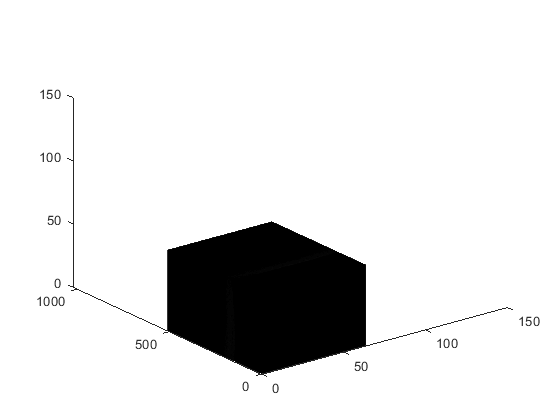

In [4]:
% 代码段4
% Start Inverting
% 开始倒置
display('Inverting...');
tic;

% Step 1: Scale radiometric component
% See 2.1.5 Validating radiometric falloff for details
if (isdiffuse)
    data = data.*(grid_z.^4);
else
    data = data.*(grid_z.^2);
end

% Step 2: Resample time axis and pad result
% M: 512
% N:64, t-y-x
% 将x，y，t三轴均扩展2倍，以重采样
% 重采样：可分为downsampling和upsampling

% tdata: 1024*128*128
tdata = zeros(2.*M,2.*N,2.*N);
% mtx: 512*512
% data: 512*64*64
% data(:,:): 512*4096,将64个512*64的平面并到一起，故为512*4096
% mtx*data(:,:): 512*4096
% [M N N]: 512*64*64
% 故执行下面一行后，tdata只有1/8不为0
tdata(1:end./2,1:end./2,1:end./2)  = reshape(mtx*data(:,:),[M N N]);

%*************************验证tdata***************************************
% ThreeD: 将三维数组转换为图像
tdata = ones(2.*M,2.*N,2.*N);
tdata(1:end./2,1:end./2,1:end./2)  = reshape(mtx*data(:,:),[M N N]);
Three_D(tdata);
tdata = zeros(2.*M,2.*N,2.*N);
tdata(1:end./2,1:end./2,1:end./2)  = reshape(mtx*data(:,:),[M N N]);
%************************************************************************


% Step 3: Convolve with inverse filter and unpad result
% tdata: 1024*128*128
% fftn(tdata): 1024*128*128 complex data
% invpsf: 1024*128*128(complex)
% tvol: 1024*128*128 double
tvol = ifftn(fftn(tdata).*invpsf);

% tvol: 512*64*64 double
% 在此处再次取出1/8
tvol = tvol(1:end./2,1:end./2,1:end./2);

% Step 4: Resample depth axis and clamp results
% mexi: 512*512
% tvol: 512*64*64
% mtxi*tvol(:,:): 512*4096
% vol: 512*64*64
vol  = reshape(mtxi*tvol(:,:),[M N N]);
% 将复数取实部并把负数置为0
vol  = max(real(vol),0);

display('... done.');
time_elapsed = toc;

display(sprintf(['Reconstructed volume of size %d x %d x %d '...
    'in %f seconds'], size(vol,3),size(vol,2),size(vol,1),time_elapsed));
    

display("This cell run successfully")




In [5]:
% 代码段5
% range = M.*c.*bin_resolution; % Maximum range for histogram
% 时间轴变换为z轴，深度为之前的一半
% Review: size(vol,1) segments from 0 to range./2(2.4576/2=1.2288)
% tic_z, tic_x, tic_y 用于画图时固定坐标
% size(vol,1): z方向分辨率
tic_z = linspace(0,range./2,size(vol,1));
% size(vol,2): y方向分辨率
tic_y = linspace(-width,width,size(vol,2));
% size(vol,3): x方向分辨率
tic_x = linspace(-width,width,size(vol,3));

% Crop and flip reconstructed volume for visualization
% 裁剪和反转变换得到的3D复原物体 以 可视化
% ind的含义?????
ind = round(M.*2.*width./(range./2));
% vol: 512*64*64, z*y*x
% 将vol的第三维，即x轴，逆序(反转变换)
vol = vol(:,:,end:-1:1);
% z_offset,去除开始的无效数据
% 1:ind, ind含义尚不理解
vol = vol((1:ind)+z_offset,:,:);

% 对应改变z轴坐标
tic_z = tic_z((1:ind)+z_offset);

% 下一部分开始绘图
display("This cell run successfully")

    "This cell run successfully"




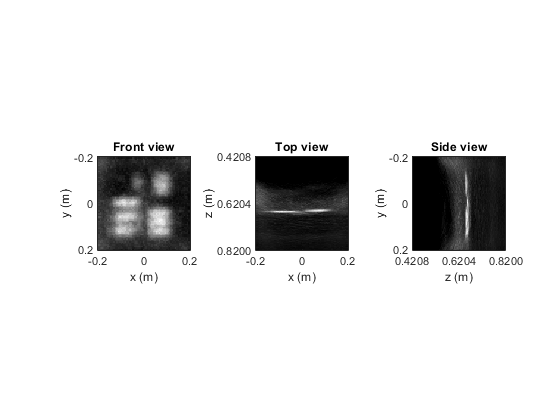

In [6]:
% 代码段6
% View result
figure('pos',[10 10 900 300]);

subplot(1,3,1);
% 前视图即z轴(vol的第一维)的最大值
imagesc(tic_x,tic_y,squeeze(max(vol,[],1)));
title('Front view');
set(gca,'XTick',linspace(min(tic_x),max(tic_x),3));
set(gca,'YTick',linspace(min(tic_y),max(tic_y),3));
xlabel('x (m)');
ylabel('y (m)');
colormap('gray');
axis square;

subplot(1,3,2);
% 俯视图即y轴(vol的第2维)的最大值
imagesc(tic_x,tic_z,squeeze(max(vol,[],2)));
title('Top view');
set(gca,'XTick',linspace(min(tic_x),max(tic_x),3));
set(gca,'YTick',linspace(min(tic_z),max(tic_z),3));
xlabel('x (m)');
ylabel('z (m)');
colormap('gray');
axis square;

subplot(1,3,3);
% 俯视图即z轴(vol的第3维)的最大值
imagesc(tic_z,tic_y,squeeze(max(vol,[],3))')
title('Side view');
set(gca,'XTick',linspace(min(tic_z),max(tic_z),3));
set(gca,'YTick',linspace(min(tic_y),max(tic_y),3));
xlabel('z (m)');
ylabel('y (m)');
colormap('gray');
axis square;


## Supplementary Discussion

### Resolution limits
The accuracy of the reconstructed shape depends on several factors, including the system jitter, the scanning area $2\omega \times 2 \omega$, and the distance of the hidden object from the wall z (Figure 3). Here, the resolution limit is defined as the minimum resolvable distance of two scatterers $\Delta d$. Specifically, two scattering points, q1 and q2, are resolvable in space only if their indirect signals are resolvable in time:

$$\Delta d = abs( \| p-q_{1}\|_{2}-\|p-q_{2}\|_{2})\geq \frac{c\Delta t}{2}$$
equation (23)


Using this formula, a bound on the minimum axial distance, i.e., along the z-axis, can be defined as $\Delta z \geq \frac{c\Delta t}{2}$. In practice, this bound is related to the full width at half maximum (FWHM) of the temporal jitter of the detection system, represented by the scalar	$\gamma$, as
$$\Delta z \geq \frac{c\gamma}{2}$$

As illustrated in Figure 3, the FWHM is a practical means to derive resolution limits of a NLOS imaging system and it is closely related to diffraction-limited resolution limits in microscopy. Alternative resolution criteria include the Rayleigh criterion and the Sparrow limit. However, due to the fact that the temporal point spread functions in NLOS imaging are not Airy disks, the FWHM criterion is an appropriate formulation for this application. If the temporal jitter follows a Gaussian shape, the FWHM is directly proportional to the standard deviation $\sigma$ of the jitter as $\gamma = 2\sqrt{2ln2\sigma}$.

Similarly, we can derive an approximate bound on the lateral resolution $\Delta x$. For this purpose, we assume that $\delta x$ is much smaller than the area of the wall being sampled, such that $cos(\theta)\approx \frac{c\Delta t}{(2\Delta x)}$(see Figure 3(d)).

Then 

\begin{align*}
\frac{c\Delta t}{2}&\approx \Delta x cos(\theta)\\
&\approx \Delta x cos(tan^{-1}(\frac{z}{\omega}))\\
&= \Delta x \frac{\omega}{\sqrt{\omega ^{2} + z^{2}}}\\
\end{align*}

equation 26

Using the FWHM criterion, the minimum lateral distance between two points is

$$\Delta x \geq \frac{c\sqrt{\omega ^{2}+z^{2}}}{2\omega}\gamma$$

Equation 27

    

### Compute time and memory requirements

Here, we list expected runtimes and memory requirements for several non-line-of-sight imaging approaches. The backprojection algorithm, a direct inverse of the light transport matrix, and iterative approaches to solving the inverse problem have been proposed in previous work. The discrete light cone transform introduced in this paper allows a direct inverse of the light transport matrix to be computed with orders of magnitude lower computational complexity and less memory requirements than existing methods. In the following, we assume for simplicity that the recorded histograms sample the hidden volume of resolution $N\times N\times N$ at $N\times N$ locations on the wall. Each of the measured locations is represented as a temporal histogram of length N. Thus, the light transport matrix A is of size $N^3\times N^3$ and it contains $N^5$ non-zero elements that would have to be stored in a sparse matrix representation.


The backprojection algorithm is a matrix-vector product of the transpose light transport matrix and the measurement vector, which has a computational complexity of $O(N^5)$. The backprojection algorithm can be computed without explicitly constructing the matrix, and only requires $O(N^3)$ memory.


Computing the inverse light transport matrix, for example via the singular value decomposition, includes $O(N^9)$ computational complexity for computing the SVD as well as two additional matrix-vector multiplications and a vector-vector multiplication. The overall runtime is still on the order of $O(N^9)$ and the memory requirements just for storing the decompositions is $O(N^6)$ . An attractive alternative to the SVD would be an iterative, large scale solver, such as the conjugate gradient method. In this case, the computational complexity for each iteration would be in the same order as the backprojection algorithm. In practice, it is computationally more efficient to discretize the light transport matrix for use in iterative procedures, $^20$ at the cost of increasing memory requirements to the order of $O(N^5)$. 


The discrete light cone transform (LCT) applies a transformation operation along the time axis $(O(N^3))$, followed by a 3D Fourier transform $(O(N^3logN))$, an element-wise multiplication $(O(N^3))$, an inverse 3D Fourier transform $(O (N^3logN))$, and another transformation operation $(O(N^3))$. The combined computational complexity is $O(N^3logN)$. The alternating-direction method of multipliers (ADMM) and its linearized version (L-ADMM) are iterative algorithms that apply the LCT sequentially along with other, computationally less complex, proximal operators (see Supplementary Derivations). Therefore, the order of the computational complexity per iteration is similar to that of the LCT. The LCT only requires a single volume to be stored in memory, so the memory requirements are several orders of magnitude better than existing methods. ADMM and L-ADMM require several intermediate variables of the same size as the volume to be stored but the order of memory required remains the same as the LCT.

![ComputationRequest](image/ComputationRequest.jpg)


#### 计算时间和存储需求

在这里，我们列出了几种非视距成像方法的预期运行时间和内存要求。 在以前的工作中已经提出了反投影算法，光传输矩阵的直接求逆，以及解决逆问题的迭代方法。在下文中，我们假定为简单起见，该记录的柱状图样的分辨率$N\times N\times$在$N\times N$个位置上。 每个测量位置表示为长度为N的时间直方图。因此，光传输矩阵A的大小为$N^3\times N^3$并且它包含$N^5$非零元素, 并且存储在稀疏矩阵表示中。

反投影算法是转置光传输矩阵和测量矢量的矩阵矢量乘积，其计算复杂度为$O(N^5)$. 可以在不明确构造矩阵的情况下计算反投影算法，并且仅需要$O(N^3)$内存。

计算逆光传输矩阵，例如通过奇异值分解，包括用于计算SVD的$O(N^9)$计算复杂度以及两个额外的矩阵矢量乘法和矢量矢量乘法。整个运行时仍然在$O(N^9)$的数量级，并且仅用于存储分解的内存要求是$O(N^6)$。SVD的有吸引力的替代方案是迭代的大规模求解器，例如共轭梯度方法。在这种情况下，每次迭代的计算复杂度与反投影算法的阶数相同。 在实践中，将光传输矩阵离散化以用于迭代过程在计算上更有效，其代价是将内存需求增加到$O(N^5)$的量级。


离散光锥变换（LCT）沿时间轴$(O(N^3))$应用变换操作，然后是3D傅里叶变换$(O(N^3logN))$，元素乘法$((O(N^3))$，逆3D傅立叶变换$(O(N^3logN))$，以及另一个变换运算$(O(N^3))$。组合的计算复杂度是$ O（N ^ 3logN）$。 乘法器的交替方向（ADMM）及其线性化版本（L-ADMM）是迭代算法，它们将LCT与其他计算复杂度较低的近端算子一起顺序应用（参见补充推导). 因此，每次迭代的计算复杂度的顺序类似于LCT的阶数。 LCT只需要将一个'形状'在内存中，因此内存要求比现有方法好几个数量级。 ADMM和L-ADMM需要几个与要存储的'形状'大小相同的中间变量，但所需的内存阶数与LCT保持一致。

## Supplementary Results


### Real-time non-line-of-sight tracking

Instead of fully recovering the shape of non-line-of-sight objects, one may also be interested in detecting the presence of an object or roughly track its location.[11–13] The minimum number of required sample points to unambiguously track a single 3D object is three. The detector records the time of flight between the three sample points and the NLOS object. A single sample point is ambiguous because the manifold of possible 3D locations of the corresponding object is the surface of a hemisphere. With three measurements, we can compute the intersection of the three respective hemispheres to triangulate the position of the object.

Figure $\ref{Fig13}$ shows the results of tracking the 3D location of a planar traffic sign outside the line of sight of the detector. Three locations on the wall are sampled with mutual distances of approx. 60 cm, as indicated by the red dots. This tracking procedure is performed at interactive framerates with 3Hz and an exposure time of 0.1s per sample. Please also see the Supplementary Video for additional real-time tracking results in outdoor applications.

\begin{figure}
    \centering 
    \includegraphics{image/figs13.png} 
    \caption{Figure 19: Tracking results for a non-line-of-sight retroreflective sign moving across a room. The system records measurements at three different points (shown in red) on a wall as position z = 0, and uses the indirect signal to compute the distance of the sign from the wall. The intersection of three spheres produces 3D coordinates of the sign (shown in blue). The exposure period for each point is 0.1s, producing 3D coordinates at a rate of approximately 3Hz. Measurements become noisier as the object moves away from the wall.} 
    \label{Fig13}
\end{figure}

#### 实时的非视距目标跟踪
人们也可能对检测物体的存在或粗略跟踪其位置感兴趣，而不是完全恢复非视线物体的形状[11-13]。明确跟踪单个3D对象所需的最小样本点数为3。 探测器记录三个采样点和NLOS对象之间的飞行时间。 单个采样点是模糊的，因为相应对象的可能3D位置的流形是半球的表面。 通过三次测量，我们可以计算三个相应半球的交点，以对物体的位置进行三角测量。

图13显示了跟踪探测器视线外的平面交通标志的3D位置的结果。 墙上的三个位置被采样，相互距离约为。 60厘米，如红点所示。 该跟踪过程在3Hz的交互式帧速率下进行，每个样本的曝光时间为0.1s。 另请参阅补充视频，了解户外应用中的其他实时跟踪结果。

# Other Research
Some other researches related about this paper are listed below:

+ Accidental pinhole and pinspeck cameras: Revealing the scene outside the picture, CVPR, 2012
+ 

## 2Accidental pinhole and pinspeck cameras: Revealing the scene outside the picture

CVPR, 2012.

Site: https://ieeexplore.ieee.org/document/6247698

Abstract: We identify and study two types of "accidental" images that can be formed in scenes. The first is an accidental pinhole camera image. The images are often mistaken for shadows, but can reveal structures outside a room, or the unseen shape of the light The second class of accidental images are "inverse" pinhole camera images, formed by subtracting an image with a small occluder present from a reference image without the occluder. The reference image can be earlier frame of a video sequence. The types of accidental images happen in a variety of different situations (an indoor scene illuminated by natural light, a street with a person walking under the shadow of a building, etc.). Accidental cameras can reveal information about the scene outside the image, The lighting conditions, or the aperture by which light enters the scene.

### 2意外的针孔和pinpeck相机：显示图片外的场景


https://ieeexplore.ieee.org/document/6247698


摘要:我们识别和研究可以在场景中形成的两种类型的“偶然”图像。 **第一类**是意外的针孔相机图像。 图像经常被误认为阴影，但可以揭示房间外的结构，或者看不见的光线形状. **第二类**偶然图像是“逆”针孔相机图像，通过从参考中存在的小遮挡物减去图像而形成 没有遮挡物的图像。 参考图像可以是视频序列的较早帧。 意外图像的类型发生在各种不同的情况下（由自然光照射的室内场景，在建筑物的阴影下行走的人的街道等）。 意外相机可以显示有关图像外部场景，光照条件或光线进入场景的光圈的信息。

## 8 Recovering three-dimensional shape around a corner using ultrafast time-of-flight imaging

Nature Communications, 2012

https://www.nature.com/articles/ncomms1747

**Abstract**: The recovery of objects obscured by scattering is an important goal in imaging and has been approached by exploiting, for example, coherence properties, ballistic photons or penetrating wavelengths. Common methods use scattered light transmitted through an occluding material, although these fail if the occluder is opaque. Light is scattered not only by transmission through objects, but also by multiple reflection from diffuse surfaces in a scene. This reflected light contains information about the scene that becomes mixed by the diffuse reflections before reaching the image sensor. This mixing is difficult to decode using traditional cameras. Here we report the combination of a time-of-flight technique and computational reconstruction algorithms to untangle image information mixed by diffuse reflection. We demonstrate a three-dimensional range camera able to look around a corner using diffusely reflected light that achieves sub-millimetre depth precision and centimetre lateral precision over 40 cm×40 cm×40 cm of hidden space.

+ Results:
\begin{figure}
    \centering 
    \includegraphics{image/ncomms1747-f1Experimentalset-up.jpg} 
    \caption{Resutlts1: Experimental set up.(a) The capture process: we capture a series of images by sequentially illuminating a single spot on the wall with a pulsed laser and recording an image of the dashed line segment on the wall with a streak camera. The laser pulse travels a distance r1 to strike the wall at a point L; some of the diffusely scattered light strikes the hidden object (for example at s after travelling a distance r2), returns to the wall (for example at w, after travelling over r3) and is collected by the camera after travelling the final distance r4 from w to the camera centre of projection. The position of the laser beam on the wall is changed by a set of galvanometer-actuated mirrors. (b) An example of streak images sequentially collected. Intensities are normalized against a calibration signal. Red corresponds to the maximum, blue to the minimum intensities. (c) The 2D projected view of the 3D shape of the hidden object, as recovered by the reconstruction algorithm. Here the same colour map corresponds to backprojected filtered intensities or confidence values of finding an object surface at the corresponding voxel.} 
    \label{Fig1747_1}
\end{figure}

\begin{figure}
    \centering 
    \includegraphics{image/ncomms1747-f2.jpg} 
    \caption{Results2: Streak image with calibration spot.The calibration spot in a streak image (highlighted with an arrow). The calibration spot is created by an attenuated beam split off the laser beam that strikes the wall in the field of view of the camera. It allows monitoring of the long-term stability of the system and calibration for drifts in timing synchronization.} 
    \label{Fig1747_2}
\end{figure}

\begin{figure}
    \centering 
    \includegraphics{image/ncomms1747-f3.jpg} 
    \caption{Figure 3: Reconstruction algorithm.An illustrative example of geometric reconstruction using streak camera images. (a) Data capture. The object to be recovered consists of a 2 cm×2 cm size square white patch beyond the line of sight (that is, hidden). The patch is mounted in the scene and data is collected for different laser positions. The captured streak images corresponding to three different laser positions are displayed in the top row. Shapes and timings of the recorded response vary with laser positions and encode the position and shape of the hidden patch. (b) Contributing voxels in Cartesian space. For recovery of hidden position, consider the choices of contributing locations. The possible locations in Cartesian space that could have contributed intensity to the streak image pixels p, q, r are the ellipses p′, q′, r′ (ellipsoids in 3D). For illustration, these three ellipse sections are also shown in (a) bottom left in Cartesian coordinates. If there is a single world point contributing intensity to all 3 pixels, the corresponding ellipses intersect, as is the case here. The white bar corresponds to 2 cm in all sub-figures. (c) Backprojection and heatmap. We use a backprojection algorithm that finds overlayed ellipses corresponding to all pixels, Here we show summation of elliptical curves from all pixels in the first streak image. (d) Backprojection using all pixels in a set of 59 streak images. (e) Filtering. After filtering with a second derivative, the patch location and 2-cm lateral size are recovered.} 
    \label{Fig1747_2}
\end{figure}




### 8使用超快速ToF成像恢复角落周围的三维形状

自然 通讯, 2012

https://www.nature.com/articles/ncomms1747

**摘要**:通过散射遮挡的物体的恢复是成像中的重要目标，并且已经通过利用例如相干特性，弹道光子或穿透波长来接近。常用方法使用通过遮挡材料传播的散射光，但如果遮挡物是不透明的则会失败。光不仅通过物体传播而且通过场景中漫反射面的多次反射而散射。该反射光包含关于在到达图像传感器之前由漫反射混合的场景的信息。使用传统相机难以解码这种混合。在这里，我们报告了飞行时间技术和计算重建算法的组合，以解开通过漫反射混合的图像信息。我们展示了一种三维测距相机，能够使用漫反射光在拐角处观察，在40厘米×40厘米×40厘米的隐藏空间内实现亚毫米深度精度和厘米的横向精度。

## Terahertz time-gated spectral imaging for content extraction through layered structures

Nature communications, 2016

**Abstract:**
Spatial resolution, spectral contrast and occlusion are three major bottlenecks for non-invasive inspection of complex samples with current imaging technologies. We exploit the sub-picosecond time resolution along with spectral resolution provided by terahertz time-domain spectroscopy to computationally extract occluding content from layers whose thicknesses are wavelength comparable. The method uses the statistics of the reflected terahertz electric field at subwavelength gaps to lock into each layer position and then uses a time-gated spectral kurtosis to tune to highest spectral contrast of the content on that specific layer. To demonstrate, occluding textual content was successfully extracted from a packed stack of paper pages down to nine pages without human supervision. The method provides over an order of magnitude enhancement in the signal contrast and can impact inspection of structural defects in wooden objects, plastic components, composites, drugs and especially cultural artefacts with subwavelength or wavelength comparable layers.

### 太赫兹时间门控光谱成像，用于通过分层结构进行内容提取

https://www.nature.com/articles/ncomms12665

**摘要:**
空间分辨率，光谱对比度和遮挡是使用当前成像技术对复杂样品进行非侵入性检查的三个主要瓶颈。我们利用亚皮秒时间分辨率以及由太赫兹时域光谱提供的光谱分辨率来计算地从厚度波长相当的层中提取遮挡内容。该方法使用在亚波长间隙处反射的太赫兹电场的统计数据来锁定到每个层位置，然后使用时间选通的光谱峰度来调谐到该特定层上的内容的最高光谱对比度。为了证明，封闭文本内容已经成功地从一堆纸页中提取到九页而无需人工监督。该方法提供了信号对比度超过一个数量级的增强，并且可以影响木制物体，塑料部件，复合材料，药物以及具有亚波长或波长可比较层的文化人工制品中的结构缺陷的检查。

## Reconstructing Transient Images from Single-Photon Sensors

CVPR, 2017

http://www.computationalimaging.org/publications/reconstructing-transient-images-from-single-photon-sensors-cvpr-2017/

**Abstract:** Computer vision algorithms build on 2D images or 3D videos that capture dynamic events at the millisecond time scale. However, capturing and analyzing “transient images” at the picosecond scale—i.e., at one trillion frames per second—reveals unprecedented information about a scene and light transport within. This is not only crucial for time-of-flight range imaging, but it also helps further our understanding of light transport phenomena at a more fundamental level and potentially allows to revisit many assumptions made in different computer vision algorithms.

In this work, we design and evaluate an imaging system that builds on single photon avalanche diode (SPAD) sensors to capture multi-path responses with picosecond-scale active illumination. We develop inverse methods that use modern approaches to deconvolve and denoise measurements in the presence of Poisson noise, and compute transient images at a higher quality than previously reported. The small form factor, fast acquisition rates, and relatively low cost of our system potentially makes transient imaging more practical for a range of applications.

### 基于单光子检测的瞬时图像重建

**摘要:**计算机视觉算法建立在2D图像或3D视频的基础上，可以在毫秒级时间内捕获动态事件。然而，以皮秒级捕获和分析“瞬态图像” - 即每秒一万亿帧 - 揭示了关于场景和光传输的前所未有的信息。这不仅对于飞行时间范围成像至关重要，而且还有助于我们在更基础的层面上进一步理解光传输现象，并且可能允许重新审视在不同计算机视觉算法中做出的许多假设。

在这项工作中，我们设计和评估了一个基于单光子雪崩二极管（SPAD）传感器的成像系统，以捕获皮秒级有源照明的多径响应。我们开发了反演方法，使用现代方法在存在泊松噪声的情况下对测量进行去卷积和去噪，并以比先前报道的更高的质量计算瞬态图像。小尺寸，快速采集速率和相对较低的系统成本可能使瞬态成像对于一系列应用更加实用。 

## Towards Transient Imaging at Interactive Rates with Single-Photon Detectors

ICCP, 2018

**Abstract:**
Active imaging at the picosecond timescale reveals transient light transport effects otherwise not accessible by computer vision and image processing algorithms. For example, analyzing the time of flight of short laser pulses emitted into a scene and scattered back to a detector allows for depth imaging, which is crucial for autonomous driving and many other applications. Moreover, analyzing or removing global light transport effects from photographs becomes feasible. While several transient imaging systems have recently been proposed using various imaging technologies, none is capable of acquiring transient images at interactive framerates. In this paper, we present an imaging system that records transient images at up to 25 Hz. We show several transient video clips recorded with this system and demonstrate transient imaging applications, including direct-global light transport separation and enhanced depth imaging.



### 利用单光子探测器以交互速率进行瞬态成像


**摘要:** 皮秒时间刻度的主动成像揭示了瞬态光传输效应，否则计算机视觉和图像处理算法无法访问。 例如，分析发射到场景中并散射回检测器的短激光脉冲的飞行时间允许深度成像，这对于自动驾驶和许多其他应用是至关重要的。 此外，从照片分析或消除全局光传输效应变得可行。 虽然最近已经提出了使用各种成像技术的几种瞬态成像系统，但是没有一种能够以交互式帧速率获取瞬态图像。 在本文中，我们提出了一种成像系统，可记录高达25 Hz的瞬态图像。 我们展示了使用该系统记录的几个瞬态视频剪辑，并演示了瞬态成像应用，包括直接全局光传输分离和增强深度成像。


# Our idea

1. 调参.
    + 程序中有很多参数可以调整
        + 例如: Downsample时的加权系数; 形成3D图像时的参数等等
        + 有些参数改变后会比源程序更好
    + 理论上怎么优化?
    + 设定衡量复原好坏的模型, 不断改变参数以找到最好的参数
    + 或通过 deep learning 等方法调参